In [2]:
import pandas as pd
import numpy as np

df = pd.read_excel("C:\\Users\\LENOVO\\Desktop\\dataset.xlsx")
df

,Name,Sentiment Score,Success,Valuation,Fundings,R&D,Industry,CEO Experience
0,Uber,0.85,1,82.4,25.6,1.2,Transportation,10
1,Airbnb,0.82,1,47.3,20.0,0.5,Hospitality,12
2,SpaceX,0.90,1,100.3,100.0,5.0,Aerospace,15
3,Stripe,0.88,1,35.0,24.0,0.8,Financial Services,8
4,DoorDash,0.86,1,20.0,15.0,0.4,Food Delivery,7
...,...,...,...,...,...,...,...,...
222,SoftWareHouse,0.52,0,0.5,0.6,0.2,Software,7
223,ClearEnergy,0.54,0,0.5,0.6,0.2,Energy,8
224,MedTech,0.58,0,0.7,0.8,0.3,Medical,9
225,AutoRide,0.56,0,0.6,0.7,0.3,Automotive,9


In [3]:
df.columns = df.columns.str.strip()

# Check if 'Name' column exists
if 'Name' in df.columns:
    # Find duplicated names
    duplicated_names = df[df.duplicated(subset='Name', keep=False)]

    # Display duplicated names
    print("Duplicated Names:")
    print(duplicated_names[['Name']])
    
    # Optionally, you can get a list of unique duplicated names
    duplicated_names_list = df[df.duplicated(subset='Name', keep=False)]['Name'].unique()
    print("List of unique duplicated names:")
    print(duplicated_names_list)
else:
    print("Column 'Name' does not exist in the DataFrame.")

Duplicated Names:
Empty DataFrame
Columns: [Name]
Index: []
List of unique duplicated names:
[]


In [28]:
df_cleaned = df.drop_duplicates(subset='Name', keep='first')

# Path where you want to save the cleaned Excel file
output_file_path = "C:\\Users\\LENOVO\\Desktop\\dataset.xlsx"

# Write the cleaned DataFrame to a new Excel file
df_cleaned.to_excel(output_file_path, sheet_name='Sheet1', index=False)

print(f"Cleaned data successfully written to {output_file_path}")

Cleaned data successfully written to C:\Users\LENOVO\Desktop\dataset.xlsx


In [4]:
# Check if 'Success' column exists
if 'Success' in df.columns:
    # Count the number of successful and unsuccessful companies
    success_counts = df['Success'].value_counts()

    # Display the count of each success value
    print("Count of Successful and Unsuccessful Companies:")
    print(success_counts)
else:
    print("Column 'Success' does not exist in the DataFrame.")

Count of Successful and Unsuccessful Companies:
Success
1    123
0    104
Name: count, dtype: int64


In [16]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [17]:
from sklearn.preprocessing import MinMaxScaler

df = pd.DataFrame(df)

# Normalize Valuation, Fundings, and CEO Experience using Min-Max normalization
scaler = MinMaxScaler()
df[['Valuation', 'Fundings', 'CEO Experience']] = scaler.fit_transform(df[['Valuation', 'Fundings', 'CEO Experience']])

# Calculate success rate
df['Success Rate'] = (0.3 * df['Sentiment Score'] + 
                      0.5 * df['Success'] + 
                      0.1 * df['Valuation'] + 
                      0.1 * df['Fundings']) 

# Display the updated DataFrame
df

,Name,Sentiment Score,Success,Valuation,Fundings,R&D,Industry,CEO Experience,Success Rate
0,Uber,0.85,1,0.054681,0.252261,1.2,Transportation,0.375000,0.785694
1,Airbnb,0.82,1,0.031275,0.195980,0.5,Hospitality,0.458333,0.768725
2,SpaceX,0.90,1,0.066618,1.000000,5.0,Aerospace,0.583333,0.876662
3,Stripe,0.88,1,0.023073,0.236181,0.8,Financial Services,0.291667,0.789925
4,DoorDash,0.86,1,0.013070,0.145729,0.4,Food Delivery,0.250000,0.773880
...,...,...,...,...,...,...,...,...,...
222,SoftWareHouse,0.52,0,0.000067,0.001005,0.2,Software,0.250000,0.156107
223,ClearEnergy,0.54,0,0.000067,0.001005,0.2,Energy,0.291667,0.162107
224,MedTech,0.58,0,0.000200,0.003015,0.3,Medical,0.333333,0.174322
225,AutoRide,0.56,0,0.000133,0.002010,0.3,Automotive,0.333333,0.168214


In [18]:
from sklearn.preprocessing import MinMaxScaler

df = pd.DataFrame(df)

# Normalize Valuation, Fundings, and CEO Experience using Min-Max normalization
scaler = MinMaxScaler()
df[['Valuation', 'Fundings', 'CEO Experience']] = scaler.fit_transform(df[['Valuation', 'Fundings', 'CEO Experience']])

# Calculate success rate
df['Success Rate'] = (0.3 * df['Sentiment Score'] + 
                      0.5 * df['Success'] + 
                      0.1 * df['Valuation'] + 
                      0.1 * df['Fundings'])*100

# Display the updated DataFrame
df

,Name,Sentiment Score,Success,Valuation,Fundings,R&D,Industry,CEO Experience,Success Rate
0,Uber,0.85,1,0.054681,0.252261,1.2,Transportation,0.375000,78.569426
1,Airbnb,0.82,1,0.031275,0.195980,0.5,Hospitality,0.458333,76.872549
2,SpaceX,0.90,1,0.066618,1.000000,5.0,Aerospace,0.583333,87.666178
3,Stripe,0.88,1,0.023073,0.236181,0.8,Financial Services,0.291667,78.992537
4,DoorDash,0.86,1,0.013070,0.145729,0.4,Food Delivery,0.250000,77.387988
...,...,...,...,...,...,...,...,...,...
222,SoftWareHouse,0.52,0,0.000067,0.001005,0.2,Software,0.250000,15.610717
223,ClearEnergy,0.54,0,0.000067,0.001005,0.2,Energy,0.291667,16.210717
224,MedTech,0.58,0,0.000200,0.003015,0.3,Medical,0.333333,17.432151
225,AutoRide,0.56,0,0.000133,0.002010,0.3,Automotive,0.333333,16.821434


In [93]:
from sklearn.preprocessing import MinMaxScaler

df = pd.DataFrame(df)

# Normalize Valuation, Fundings, and CEO Experience using Min-Max normalization
scaler = MinMaxScaler()
df[['Valuation', 'Fundings', 'CEO Experience']] = scaler.fit_transform(df[['Valuation', 'Fundings', 'CEO Experience']])

# Calculate success rate
df['Success Rate'] = (0.7 * df['Sentiment Score'] + 0.3 * df['Valuation'] + 0.2 * df['CEO Experience'] + 0.2 * df['Fundings'])*100
                      
                      

# Display the updated DataFrame
df

,Name,Sentiment Score,Success,Valuation,Fundings,R&D,Industry,CEO Experience,Success Rate
0,Uber,0.85,1,0.054681,0.252261,1.2,0.485714,0.375000,73.685664
1,Airbnb,0.82,1,0.031275,0.195980,0.5,0.657143,0.458333,71.424515
2,SpaceX,0.90,1,0.066618,1.000000,5.0,0.685714,0.583333,96.665200
3,Stripe,0.88,1,0.023073,0.236181,0.8,0.571429,0.291667,72.849136
4,DoorDash,0.86,1,0.013070,0.145729,0.4,0.600000,0.250000,68.506677
...,...,...,...,...,...,...,...,...,...
222,SoftWareHouse,0.52,0,0.000067,0.001005,0.2,0.057143,0.250000,41.422101
223,ClearEnergy,0.54,0,0.000067,0.001005,0.2,0.257143,0.291667,43.655434
224,MedTech,0.58,0,0.000200,0.003015,0.3,0.085714,0.333333,47.332970
225,AutoRide,0.56,0,0.000133,0.002010,0.3,0.000000,0.333333,45.910869


In [94]:
file_path = "C:\\Users\\LENOVO\\Desktop\\dataset.xlsx" # Replace with your file path

# Save the updated DataFrame to an Excel file
df.to_excel(file_path, index=False, sheet_name='Updated Data')

print(f"DataFrame has been saved to {file_path}")

DataFrame has been saved to C:\Users\LENOVO\Desktop\dataset.xlsx


In [96]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

label_encoder = LabelEncoder()
df['Industry'] = label_encoder.fit_transform(df['Industry'])

# Normalize the 'Industry' column using MinMaxScaler
scaler = MinMaxScaler()
df['Industry'] = scaler.fit_transform(df[['Industry']])

# Save the updated DataFrame to an Excel file
df.to_excel(file_path, index=False, sheet_name='Updated Data')

print(f"DataFrame with normalized Industry column has been saved to {file_path}")

DataFrame with normalized Industry column has been saved to C:\Users\LENOVO\Desktop\dataset.xlsx


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define features and target variable
X = df[['Sentiment Score', 'Valuation', 'Fundings', 'R&D', 'Industry', 'CEO Experience']]
y = df['Success Rate']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Support Vector Regressor': SVR()
}

# Train and evaluate models
results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Evaluate performance
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[model_name] = {
        'Mean Absolute Error': mae,
        'Mean Squared Error': mse,
        'R^2 Score': r2
    }
    
    print(f"--- {model_name} ---")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R^2 Score: {r2:.2f}")
    print("\n")

# Display results
results_df = pd.DataFrame(results).T
print("\nModel Comparison:")
print(results_df)

--- Linear Regression ---
Mean Absolute Error: 0.00
Mean Squared Error: 0.00
R^2 Score: 1.00


--- Random Forest Regressor ---
Mean Absolute Error: 0.30
Mean Squared Error: 0.40
R^2 Score: 1.00


--- Support Vector Regressor ---
Mean Absolute Error: 1.17
Mean Squared Error: 2.86
R^2 Score: 0.98



Model Comparison:
                          Mean Absolute Error  Mean Squared Error  R^2 Score
Linear Regression                1.374746e-14        2.228018e-28   1.000000
Random Forest Regressor          3.034663e-01        4.044994e-01   0.996786
Support Vector Regressor         1.171278e+00        2.864478e+00   0.977237


--- Linear Regression ---
Mean Absolute Error: 7.62
Mean Squared Error: 96.54
R^2 Score: 0.88


--- Random Forest Regressor ---
Mean Absolute Error: 0.44
Mean Squared Error: 2.13
R^2 Score: 1.00


--- Support Vector Regressor ---
Mean Absolute Error: 6.07
Mean Squared Error: 105.44
R^2 Score: 0.87



Model Comparison:
                          Mean Absolute Error  Mean Squared Error  R^2 Score
Linear Regression                    7.621955           96.535192   0.884839
Random Forest Regressor              0.436492            2.133663   0.997455
Support Vector Regressor             6.073308          105.435715   0.874222


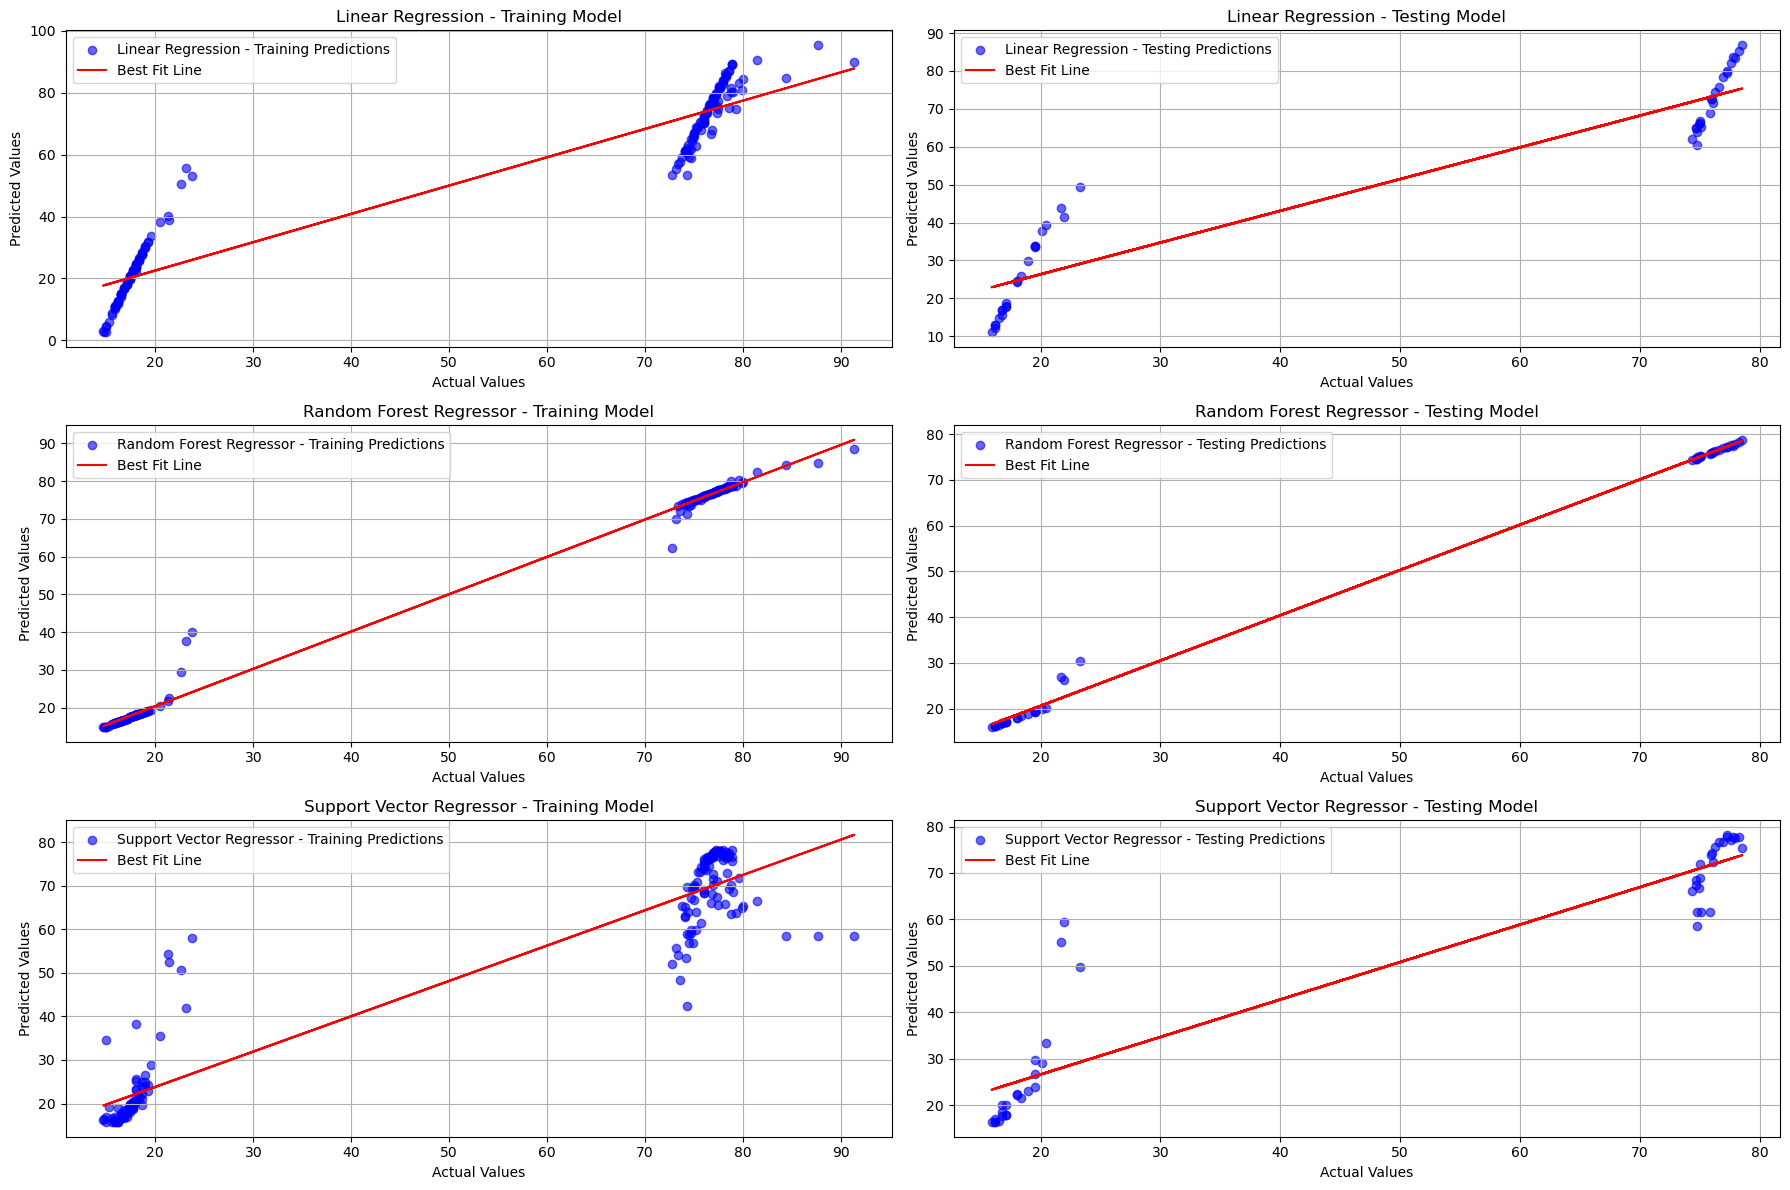

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Support Vector Regressor': SVR()
}

# Train and evaluate models
results = {}
y_train_preds = {}  # Dictionary to store training predictions for each model
y_test_preds = {}   # Dictionary to store testing predictions for each model

for model_name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions on training data
    y_train_pred = model.predict(X_train_scaled)
    y_train_preds[model_name] = y_train_pred
    
    # Make predictions on testing data
    y_test_pred = model.predict(X_test_scaled)
    y_test_preds[model_name] = y_test_pred
    
    # Evaluate performance
    mae = mean_absolute_error(y_test, y_test_pred)
    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    
    results[model_name] = {
        'Mean Absolute Error': mae,
        'Mean Squared Error': mse,
        'R^2 Score': r2
    }
    
    print(f"--- {model_name} ---")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R^2 Score: {r2:.2f}")
    print("\n")

# Display results
results_df = pd.DataFrame(results).T
print("\nModel Comparison:")
print(results_df)

# Plotting
def plot_best_fit_line(y_true, y_pred, model_name, ax):
    """Plot actual vs. predicted values and best fit line."""
    ax.scatter(y_true, y_pred, label=f'{model_name} Predictions', color='blue', alpha=0.6)
    
    # Calculate and plot the best fit line
    slope, intercept = np.polyfit(y_true, y_pred, 1)
    line = slope * y_true + intercept
    ax.plot(y_true, line, color='red', label='Best Fit Line')
    
    # Set labels and title
    ax.set_xlabel('Actual Values')
    ax.set_ylabel('Predicted Values')
    ax.set_title(f'{model_name} Model')
    ax.legend()
    ax.grid(True)

# Create subplots for training and testing data
fig, axes = plt.subplots(3, 2, figsize=(18, 12))

# Plot for each model on training data
for i, (model_name, y_train_pred) in enumerate(y_train_preds.items()):
    plot_best_fit_line(y_train, y_train_pred, f'{model_name} - Training', axes[i, 0])

# Plot for each model on testing data
for i, (model_name, y_test_pred) in enumerate(y_test_preds.items()):
    plot_best_fit_line(y_test, y_test_pred, f'{model_name} - Testing', axes[i, 1])

# Adjust layout
plt.tight_layout()
plt.show()


In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = "C:\\Users\\LENOVO\\Desktop\\dataset.xlsx"
df = pd.read_excel(file_path)

# Define features and target variable, excluding 'Industry'
X = df[['Sentiment Score', 'Valuation', 'Fundings', 'R&D', 'CEO Experience']]
y = df['Success Rate']

# Normalize numerical features
scaler = StandardScaler()
X[['Valuation', 'Fundings', 'R&D', 'CEO Experience']] = scaler.fit_transform(X[['Valuation', 'Fundings', 'R&D', 'CEO Experience']])

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Support Vector Regressor': SVR()
}

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models
for model_name, model in models.items():
    model.fit(X_train, y_train)

# Example new data
new_data = pd.DataFrame({
    'Sentiment Score': [0.60],
    'Valuation': [4.0],      # Example value in billions
    'Fundings': [5.0],        # Example value in billions
    'R&D': [0.3],             # Example value in billions
    'CEO Experience': [5]    # Example value in years
})

# Preprocess the new data
new_data[['Valuation', 'Fundings', 'R&D', 'CEO Experience']] = scaler.transform(new_data[['Valuation', 'Fundings', 'R&D', 'CEO Experience']])

# Prepare features for prediction
X_new = new_data[['Sentiment Score', 'Valuation', 'Fundings', 'R&D', 'CEO Experience']]

# Make predictions
predictions = {}
for model_name, model in models.items():
    y_new_pred = model.predict(X_new)
    predictions[model_name] = y_new_pred[0]

# Display predictions
print("Predictions for new data:")
for model_name, pred in predictions.items():
    print(f"{model_name}: {pred:.2f}")


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18688\3265912849.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Valuation', 'Fundings', 'R&D', 'CEO Experience']] = scaler.fit_transform(X[['Valuation', 'Fundings', 'R&D', 'CEO Experience']])


Predictions for new data:
Linear Regression: 362.00
Random Forest Regressor: 56.46
Support Vector Regressor: 69.80


In [5]:
!pip install textblob




  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
   - ------------------------------------- 30.7/626.3 kB 262.6 kB/s eta 0:00:03
   - ------------------------------------- 30.7/626.3 kB 262.6 kB/s eta 0:00:03
   - ------------------------------------- 30.7/626.3 kB 262.6 kB/s eta 0:00:03
   - ------------------------------------- 30.7/626.3 kB 262.6 kB/s eta 0:00:03
   - ------------------------------------- 30.7/626.3 kB 262.6 kB/s eta 0:00:03
   -- ------------------------------------ 41.0/626.3 kB 122.9 kB/s eta 0:00:05
   --- -------------------

In [13]:
import pandas as pd
from textblob import TextBlob

# Function to calculate sentiment score for a text
def calculate_sentiment_score(text):
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity
    return sentiment_score

# Function to process the uploaded file and calculate average sentiment score
def process_reviews(file_path):
    df = pd.read_excel(file_path)
    
    # Assuming the reviews are in a column named 'Review'
    df['Sentiment Score'] = df['Review'].apply(calculate_sentiment_score)
    
    # Normalize sentiment scores between 0 and 1
    df['Sentiment Score Normalized'] = (df['Sentiment Score'] + 1) / 2
    
    # Calculate the average sentiment score
    average_sentiment_score = df['Sentiment Score Normalized'].mean()
    return average_sentiment_score

# Example usage
file_path = "C:\\Users\\LENOVO\\Desktop\\sentiment.xlsx"  # Replace with the path to your Excel file

# Calculate the average sentiment score for the uploaded file
average_sentiment_score = process_reviews(file_path)

# Display the average sentiment score as a percentage
percentage_score = average_sentiment_score 
print(f"Average Sentiment Score: {percentage_score:.2f}")


Average Sentiment Score: 0.81
